##  K-Nearest Neighbors (KNN)


🧠 INICIANDO KNN AVANZADO OPTIMIZADO - ...
✅ Datos preparados: 70000 train, 30000 test
📊 Dimensionalidad final: 48 características

🎯 INICIANDO OPTIMIZACIÓN RÁPIDA CON RANDOMIZED SEARCH...
🔍 Ejecutando Randomized Search Optimizado...
Fitting 3 folds for each of 25 candidates, totalling 75 fits
✅ Randomized Search completado en 5872.01s
🏆 Mejores parámetros: {'knn__algorithm': 'auto', 'knn__leaf_size': 20, 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
📈 Mejor score CV: 0.7446

🎯 INICIANDO BÚSQUEDA MANUAL RÁPIDA...
🔍 Explorando combinaciones clave...
✅ Búsqueda manual rápida completada
🏆 Mejores parámetros manuales: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 1, 'leaf_size': 25}
📈 Mejor score manual: 0.7191

🔍 COMPARANDO MODELOS OPTIMIZADOS...

🎯 Evaluando RandomSearch_KNN...
  ✅ F1-Score: 0.7694
  ✅ CV F1-Score: 0.7446 ± 0.0029

🎯 Evaluando ManualSearch_KNN...
  ✅ F1-Score: 0.7518
  ✅ CV F1-Score: 0.7191 ± 0.0015

🏆 MEJOR MODELO AVANZADO: Ran

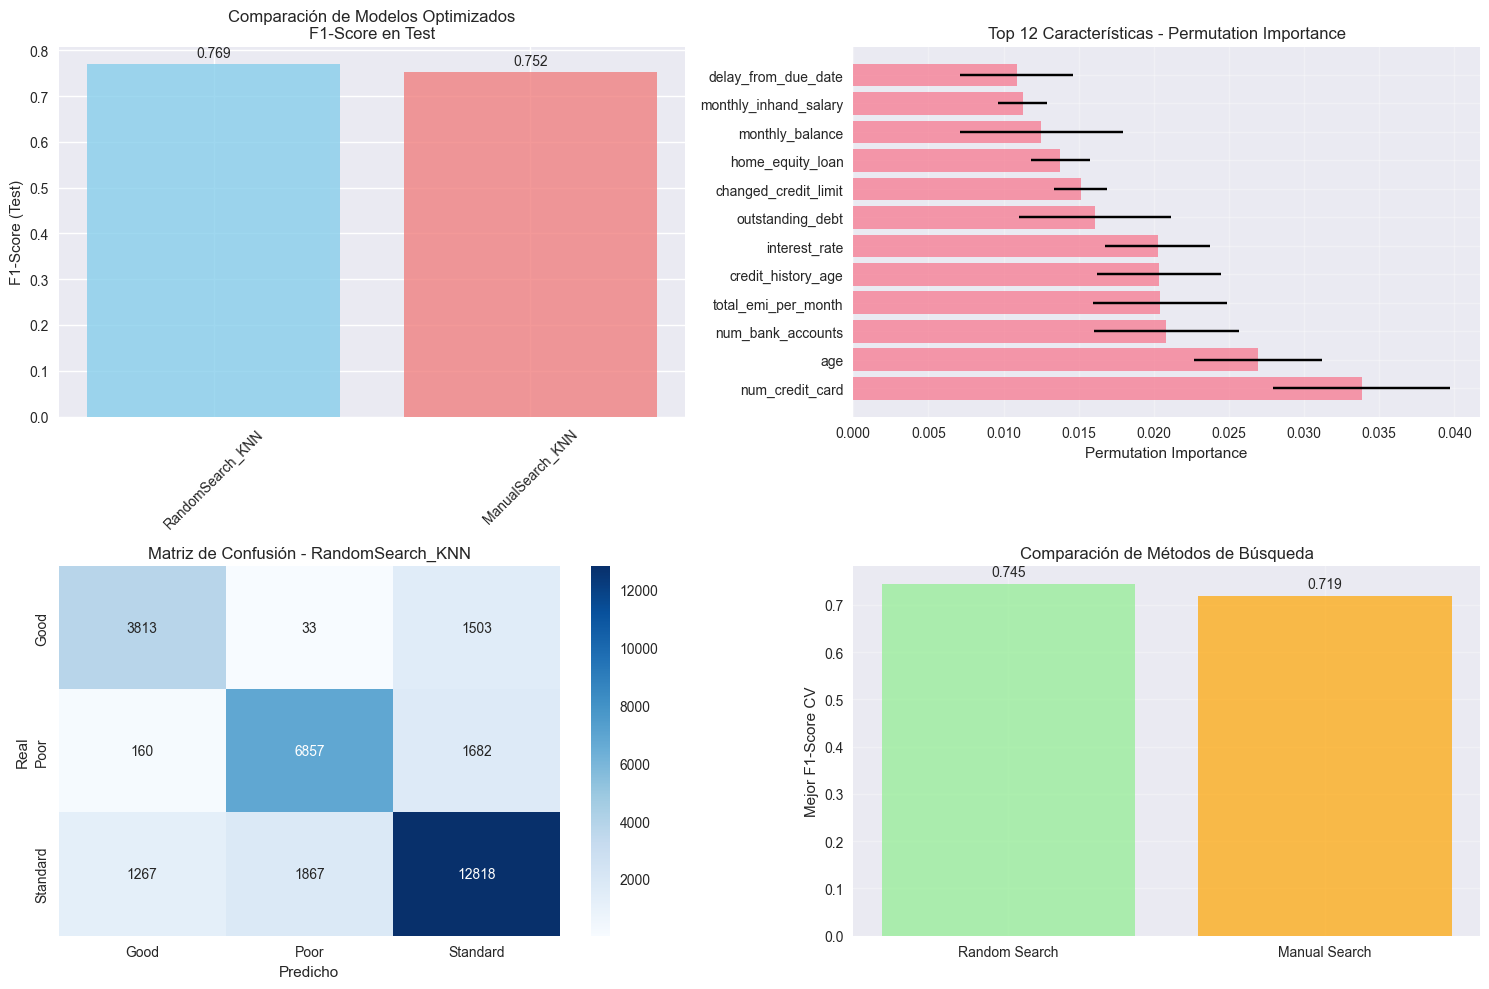


📈 ANALIZANDO COMPORTAMIENTO DEL MODELO...
📊 Análisis de sobreajuste:
  • Diferencia promedio train-test: 0.1976
  • Configuraciones probadas: 25

🎯 RESUMEN FINAL - KNN AVANZADO OPTIMIZADO (VERSIÓN RÁPIDA)
⏱️  Tiempo total ejecución: 6203.14s
🏆 Mejor modelo: RandomSearch_KNN
📈 F1-Score Test: 0.7694 (76.94%)
🎯 Validación Cruzada: 0.7446 ± 0.0058

🔧 MEJORES HIPERPARÁMETROS:
  algorithm: auto
  leaf_size: 20
  n_neighbors: 9
  p: 1
  weights: distance

📊 CARACTERÍSTICAS MÁS IMPORTANTES:
  1. num_credit_card: 0.0338
  2. age: 0.0269
  3. num_bank_accounts: 0.0208
  4. total_emi_per_month: 0.0204
  5. credit_history_age: 0.0203

⚡ EFICIENCIA COMPUTACIONAL:
  Randomized Search: 5872.01s (25 iteraciones, 3-folds)
  Permutation Importance: 55.56s (5 repeticiones, 1000 muestras)

📋 REPORTE CLASIFICACIÓN (RandomSearch_KNN):
              precision    recall  f1-score   support

        Good       0.73      0.71      0.72      5349
        Poor       0.78      0.79      0.79      8699
    Standar

In [3]:
# =============================================================================
# KNN AVANZADO OPTIMIZADO: VALIDACIÓN, TUNING E INTERPRETABILIDAD
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from scipy.stats import randint, uniform

print("🧠 INICIANDO KNN AVANZADO OPTIMIZADO - ...")
start_time = time.time()

# Configuraciones de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO CON PIPELINE
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir columnas
numerical_cols = ['age', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 
                 'interest_rate', 'delay_from_due_date', 'num_of_delayed_payment', 
                 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 
                 'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month', 
                 'amount_invested_monthly', 'monthly_balance']

categorical_cols = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train.shape[0]} train, {X_test.shape[0]} test")

# =============================================================================
# PIPELINE COMPLETO CON PREPROCESAMIENTO
# =============================================================================

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Obtener nombres de características después del preprocesamiento
preprocessor.fit(X_train)
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)) +
                ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
                 'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan'])

print(f"📊 Dimensionalidad final: {len(feature_names)} características")

# =============================================================================
# CONFIGURACIÓN RÁPIDA - OPTIMIZACIÓN CON RANDOMIZED SEARCH (PRINCIPAL)
# =============================================================================

print(f"\n🎯 INICIANDO OPTIMIZACIÓN RÁPIDA CON RANDOMIZED SEARCH...")

# Definir pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

# Distribuciones optimizadas para Randomized Search (EVITAR 'brute')
param_dist = {
    'knn__n_neighbors': randint(3, 20),
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree'],  # ELIMINADO 'brute'
    'knn__p': [1, 2],
    'knn__leaf_size': randint(20, 40)
}

# Configurar Stratified K-Fold con MENOS folds para velocidad
skf_fast = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3 folds en vez de 5

# Randomized Search CV optimizado
random_search = RandomizedSearchCV(
    knn_pipeline,
    param_dist,
    n_iter=25,  # REDUCIDO de 50 a 25
    cv=skf_fast,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

print("🔍 Ejecutando Randomized Search Optimizado...")
random_start = time.time()
random_search.fit(X_train, y_train_encoded)
random_time = time.time() - random_start

print(f"✅ Randomized Search completado en {random_time:.2f}s")
print(f"🏆 Mejores parámetros: {random_search.best_params_}")
print(f"📈 Mejor score CV: {random_search.best_score_:.4f}")

# =============================================================================
# BÚSQUEDA MANUAL RÁPIDA (ALTERNATIVA)
# =============================================================================

print(f"\n🎯 INICIANDO BÚSQUEDA MANUAL RÁPIDA...")

def evaluate_knn_config_fast(n_neighbors, weights, algorithm, p, leaf_size):
    """Evalúa una configuración específica de KNN (versión rápida)"""
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier(
            n_neighbors=n_neighbors,
            weights=weights,
            algorithm=algorithm,
            p=p,
            leaf_size=leaf_size,
            n_jobs=-1
        ))
    ])
    
    cv_scores = cross_val_score(
        model, X_train, y_train_encoded, 
        cv=skf_fast, scoring='f1_macro', n_jobs=-1
    )
    return cv_scores.mean()

# Búsqueda manual optimizada - solo combinaciones prometedoras
best_manual_score = 0
best_manual_params = {}
manual_results = []

print("🔍 Explorando combinaciones clave...")
# Solo probar combinaciones más prometedoras basadas en conocimiento de dominio
promising_combinations = [
    (5, 'uniform', 'auto', 2, 30),
    (7, 'distance', 'auto', 2, 30),
    (9, 'uniform', 'ball_tree', 1, 25),
    (11, 'distance', 'kd_tree', 2, 35),
    (15, 'uniform', 'auto', 2, 30),
]

for k, weight, algo, p_val, leaf in promising_combinations:
    score = evaluate_knn_config_fast(k, weight, algo, p_val, leaf)
    manual_results.append({
        'n_neighbors': k, 
        'weights': weight, 
        'algorithm': algo,
        'p': p_val,
        'leaf_size': leaf,
        'score': score
    })
    if score > best_manual_score:
        best_manual_score = score
        best_manual_params = {
            'n_neighbors': k, 
            'weights': weight, 
            'algorithm': algo,
            'p': p_val,
            'leaf_size': leaf
        }

print(f"✅ Búsqueda manual rápida completada")
print(f"🏆 Mejores parámetros manuales: {best_manual_params}")
print(f"📈 Mejor score manual: {best_manual_score:.4f}")

# Entrenar modelo manual
knn_manual = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(**best_manual_params, n_jobs=-1))
])
knn_manual.fit(X_train, y_train_encoded)

# =============================================================================
# COMPARACIÓN RÁPIDA DE MODELOS OPTIMIZADOS
# =============================================================================

print(f"\n🔍 COMPARANDO MODELOS OPTIMIZADOS...")

models = {
    'RandomSearch_KNN': random_search.best_estimator_,
    'ManualSearch_KNN': knn_manual
}

results_advanced = {}

for model_name, model in models.items():
    print(f"\n🎯 Evaluando {model_name}...")
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Validación cruzada rápida
    cv_scores = cross_val_score(
        model, X_train, y_train_encoded, 
        cv=skf_fast, scoring='f1_macro', n_jobs=-1
    )
    
    results_advanced[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Seleccionar mejor modelo
best_model_name = max(results_advanced.items(), key=lambda x: x[1]['f1'])[0]
best_model_advanced = results_advanced[best_model_name]['model']
best_results_advanced = results_advanced[best_model_name]

print(f"\n🏆 MEJOR MODELO AVANZADO: {best_model_name}")
print(f"📊 F1-Score: {best_results_advanced['f1']:.4f}")

# =============================================================================
# INTERPRETABILIDAD - PERMUTATION IMPORTANCE (MUESTREO PARA VELOCIDAD)
# =============================================================================

print(f"\n🔍 CALCULANDO PERMUTATION IMPORTANCE (MUESTREADO)...")

# Preparar datos preprocesados
X_test_processed = preprocessor.transform(X_test)

# Muestrear para mayor velocidad (usar solo 1000 muestras)
sample_size = min(1000, X_test_processed.shape[0])
sample_indices = np.random.choice(X_test_processed.shape[0], sample_size, replace=False)
X_test_sampled = X_test_processed[sample_indices]
y_test_sampled = y_test_encoded[sample_indices]

# Calcular permutation importance con muestreo
perm_start = time.time()
perm_importance = permutation_importance(
    best_model_advanced.named_steps['knn'],
    X_test_sampled,
    y_test_sampled,
    n_repeats=5,  # REDUCIDO de 10 a 5
    random_state=42,
    n_jobs=-1,
    scoring='f1_macro'
)
perm_time = time.time() - perm_start

print(f"✅ Permutation Importance calculado en {perm_time:.2f}s")

# Crear DataFrame con resultados
perm_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\n📊 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (Permutation):")
print(perm_df.head(10).round(4))

# =============================================================================
# VISUALIZACIONES ESENCIALES
# =============================================================================

plt.figure(figsize=(15, 10))

# Gráfico 1: Comparación de modelos optimizados
plt.subplot(2, 2, 1)
model_names = list(results_advanced.keys())
f1_scores = [results_advanced[model]['f1'] for model in model_names]
colors = ['skyblue', 'lightcoral']

bars = plt.bar(model_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Test)')
plt.title('Comparación de Modelos Optimizados\nF1-Score en Test')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Permutation Importance
plt.subplot(2, 2, 2)
top_perm = perm_df.head(12)
plt.barh(range(len(top_perm)), top_perm['importance_mean'], 
         xerr=top_perm['importance_std'], alpha=0.7, capsize=5)
plt.yticks(range(len(top_perm)), top_perm['feature'])
plt.xlabel('Permutation Importance')
plt.title('Top 12 Características - Permutation Importance')
plt.grid(True, alpha=0.3)

# Gráfico 3: Matriz de confusión del mejor modelo
plt.subplot(2, 2, 3)
y_pred_best_advanced = best_results_advanced['y_pred']
cm_best_advanced = confusion_matrix(y_test_encoded, y_pred_best_advanced)
sns.heatmap(cm_best_advanced, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión - {best_model_name}')
plt.ylabel('Real')
plt.xlabel('Predicho')

# Gráfico 4: Comparación de métodos de búsqueda
plt.subplot(2, 2, 4)
search_methods = ['Random Search', 'Manual Search']
search_scores = [random_search.best_score_, best_manual_score]
search_times = [random_time, 0]

bars = plt.bar(search_methods, search_scores, alpha=0.7, 
               color=['lightgreen', 'orange'])
plt.ylabel('Mejor F1-Score CV')
plt.title('Comparación de Métodos de Búsqueda')
for bar, score in zip(bars, search_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ANÁLISIS RÁPIDO DE COMPORTAMIENTO
# =============================================================================

print(f"\n📈 ANALIZANDO COMPORTAMIENTO DEL MODELO...")

# Usar resultados de Randomized Search para análisis
results_df = pd.DataFrame(random_search.cv_results_)
train_scores = results_df['mean_train_score']
test_scores = results_df['mean_test_score']
gap = train_scores - test_scores

print(f"📊 Análisis de sobreajuste:")
print(f"  • Diferencia promedio train-test: {gap.mean():.4f}")
print(f"  • Configuraciones probadas: {len(results_df)}")

# =============================================================================
# RESUMEN FINAL OPTIMIZADO
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*80)
print("🎯 RESUMEN FINAL - KNN AVANZADO OPTIMIZADO (VERSIÓN RÁPIDA)")
print("="*80)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor modelo: {best_model_name}")
print(f"📈 F1-Score Test: {best_results_advanced['f1']:.4f} ({best_results_advanced['f1']*100:.2f}%)")
print(f"🎯 Validación Cruzada: {best_results_advanced['cv_mean']:.4f} ± {best_results_advanced['cv_std']*2:.4f}")

print(f"\n🔧 MEJORES HIPERPARÁMETROS:")
if best_model_name == 'RandomSearch_KNN':
    best_params = random_search.best_params_
else:
    best_params = best_manual_params

for param, value in best_params.items():
    param_name = param.replace('knn__', '')
    print(f"  {param_name}: {value}")

print(f"\n📊 CARACTERÍSTICAS MÁS IMPORTANTES:")
for i in range(5):
    feature = perm_df.iloc[i]['feature']
    importance = perm_df.iloc[i]['importance_mean']
    print(f"  {i+1}. {feature}: {importance:.4f}")

print(f"\n⚡ EFICIENCIA COMPUTACIONAL:")
print(f"  Randomized Search: {random_time:.2f}s (25 iteraciones, 3-folds)")
print(f"  Permutation Importance: {perm_time:.2f}s (5 repeticiones, 1000 muestras)")

print(f"\n📋 REPORTE CLASIFICACIÓN ({best_model_name}):")
print(classification_report(y_test_encoded, y_pred_best_advanced, target_names=le.classes_))

# =============================================================================
# GUARDADO DE RESULTADOS
# =============================================================================

advanced_results = {
    'best_model': best_model_advanced,
    'best_model_name': best_model_name,
    'best_params': best_params,
    'random_search_results': random_search.cv_results_,
    'manual_search_results': manual_results,
    'permutation_importance': perm_df,
    'feature_names': feature_names,
    'results_advanced': results_advanced,
    'execution_time': execution_time,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(advanced_results, 'knn_advanced_optimized.pkl')
print(f"\n💾 Resultados optimizados guardados: 'knn_advanced_optimized.pkl'")

# Guardar el mejor modelo por separado
joblib.dump(best_model_advanced, 'best_knn_model_optimized.pkl')
print(f"💾 Mejor modelo guardado: 'best_knn_model_optimized.pkl'")

print("="*80)
print("✅ ANÁLISIS COMPLETADO - KNN OPTIMIZADO (VERSIÓN RÁPIDA)")
print("="*80)

## Random Forest


🌲 INICIANDO RANDOM FOREST AVANZADO OPTIMIZADO ...
✅ Datos preparados: 70000 train, 30000 test
📊 Dimensionalidad final: 48 características

🎯 INICIANDO OPTIMIZACIÓN CON RANDOMIZED SEARCH CV...
🔍 Ejecutando Randomized Search Optimizado...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Randomized Search completado en 1442.52s
🏆 Mejores parámetros: {'rf__bootstrap': True, 'rf__class_weight': None, 'rf__max_depth': None, 'rf__max_features': 0.3, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 4, 'rf__n_estimators': 130}
📈 Mejor score CV: 0.7543

🎯 INICIANDO BÚSQUEDA MANUAL RÁPIDA...
🔍 Explorando combinaciones clave de Random Forest...
✅ Búsqueda manual rápida completada
🏆 Mejores parámetros manuales: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True, 'class_weight': None}
📈 Mejor score manual: 0.7444

🔍 COMPARANDO MODELOS OPTIMIZADOS...

🎯 Evaluando RandomSearch_RF...
  ✅ F1-Score: 0.7627
  ✅ 

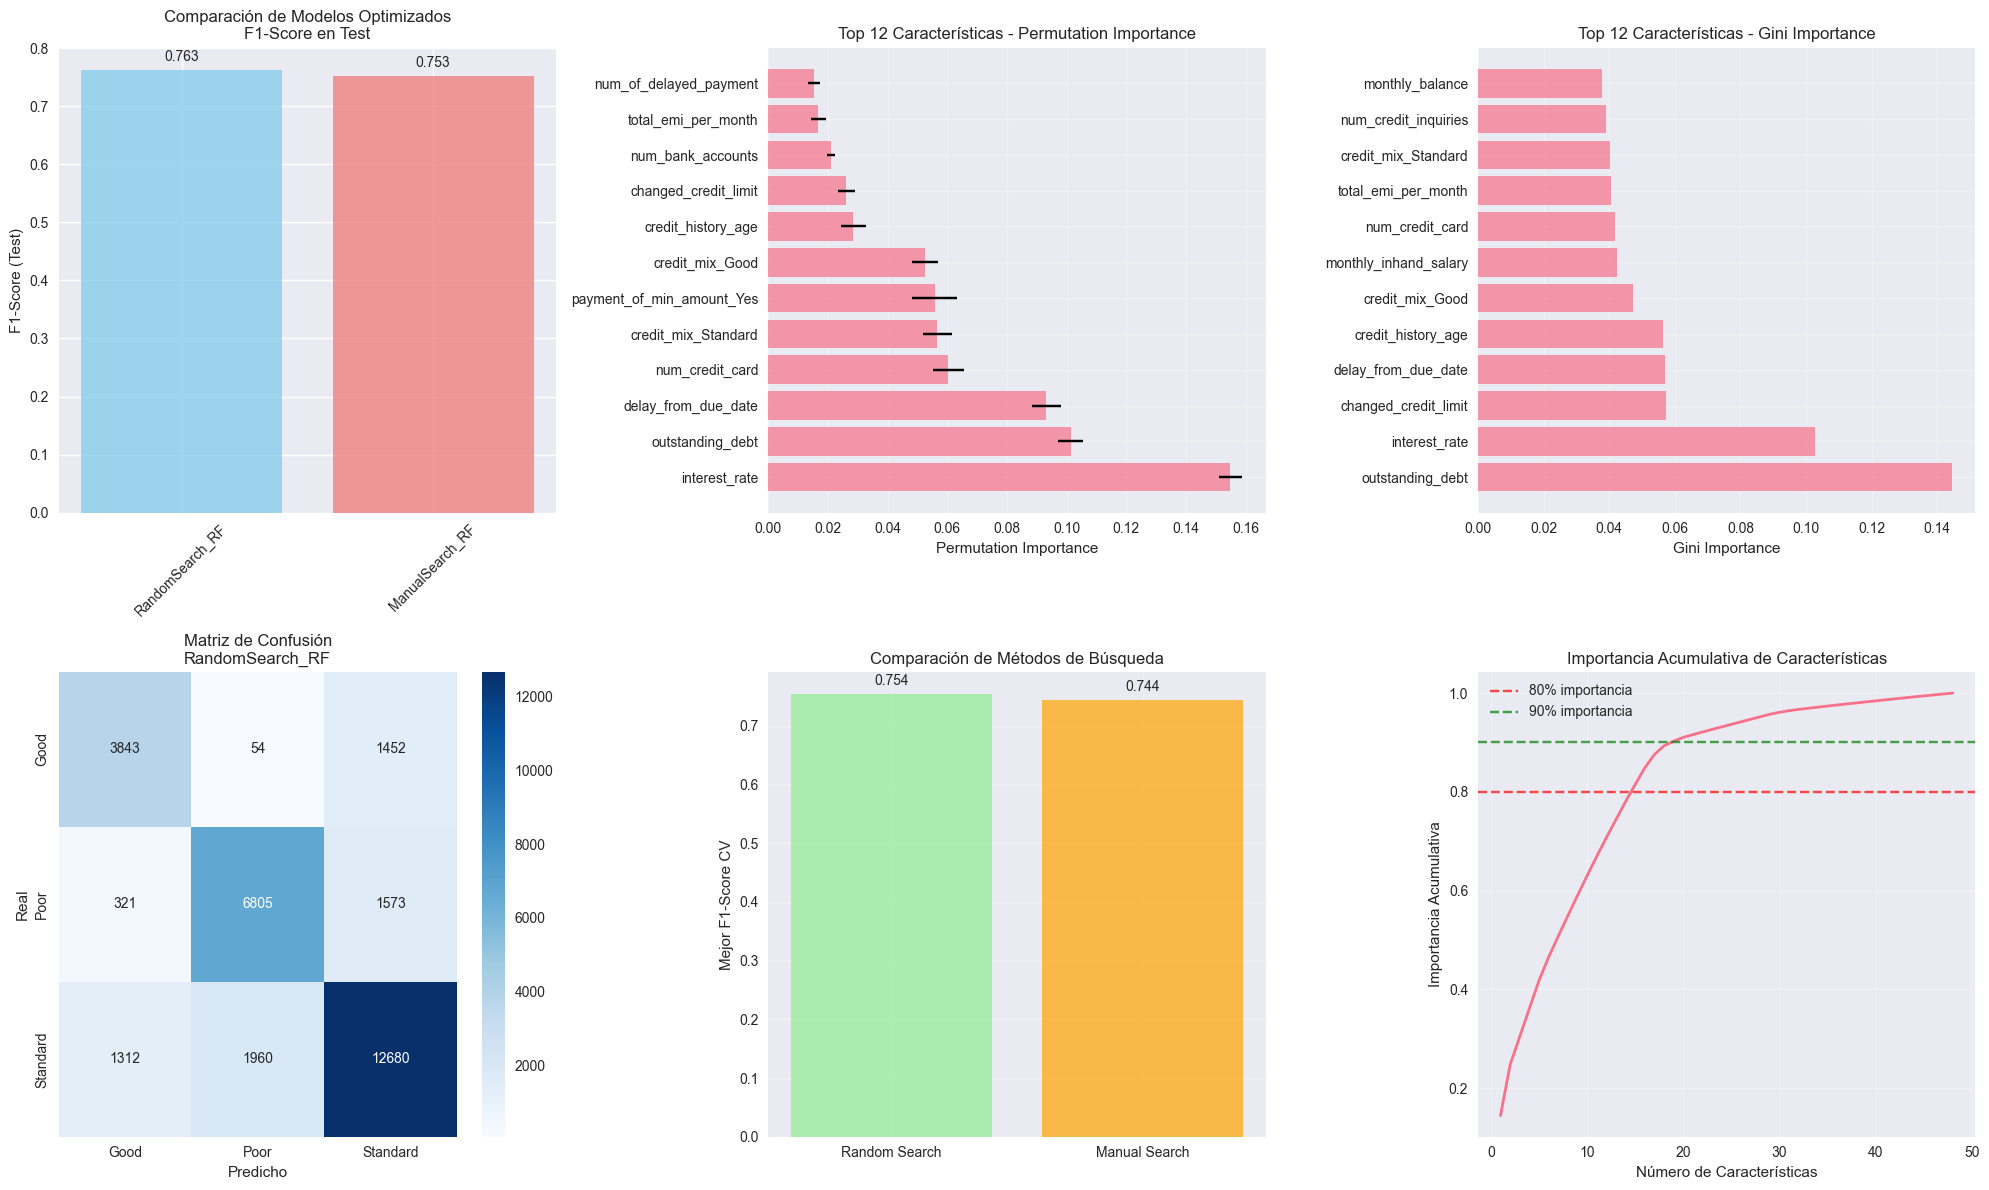


📈 ANALIZANDO COMPORTAMIENTO DEL MODELO...
📊 Análisis de sobreajuste:
  • Diferencia promedio train-test: 0.0824
  • Configuraciones probadas: 30
  • Mejor configuración: 0.7543

🎯 RESUMEN FINAL - RANDOM FOREST AVANZADO OPTIMIZADO
⏱️  Tiempo total ejecución: 1736.01s
🏆 Mejor modelo: RandomSearch_RF
📈 F1-Score Test: 0.7627 (76.27%)
🎯 Validación Cruzada: 0.7543 ± 0.0070

🔧 MEJORES HIPERPARÁMETROS:
  bootstrap: True
  class_weight: None
  max_depth: None
  max_features: 0.3
  min_samples_leaf: 3
  min_samples_split: 4
  n_estimators: 130

📊 CARACTERÍSTICAS MÁS IMPORTANTES:
  1. interest_rate: 0.1549
  2. outstanding_debt: 0.1014
  3. delay_from_due_date: 0.0932
  4. num_credit_card: 0.0604
  5. credit_mix_Standard: 0.0567

⚡ EFICIENCIA COMPUTACIONAL:
  Randomized Search: 1442.52s (30 iteraciones, 5-folds)
  Permutation Importance: 44.37s (5 repeticiones, 2000 muestras)

🎯 ESTABILIDAD DEL MODELO:
  Característica más estable: payment_behaviour_High_spent_Medium_value_payments
  Número de c

In [5]:
# =============================================================================
# RANDOM FOREST AVANZADO OPTIMIZADO: VALIDACIÓN, TUNING E INTERPRETABILIDAD
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from scipy.stats import randint, uniform

print("🌲 INICIANDO RANDOM FOREST AVANZADO OPTIMIZADO ...")
start_time = time.time()

# Configuraciones de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO CON PIPELINE
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir columnas
numerical_cols = ['age', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 
                 'interest_rate', 'delay_from_due_date', 'num_of_delayed_payment', 
                 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 
                 'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month', 
                 'amount_invested_monthly', 'monthly_balance']

categorical_cols = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train.shape[0]} train, {X_test.shape[0]} test")

# =============================================================================
# PIPELINE COMPLETO CON PREPROCESAMIENTO
# =============================================================================

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Obtener nombres de características después del preprocesamiento
preprocessor.fit(X_train)
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)) +
                ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
                 'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan'])

print(f"📊 Dimensionalidad final: {len(feature_names)} características")

# =============================================================================
# OPTIMIZACIÓN CON RANDOMIZED SEARCH CV (PRINCIPAL)
# =============================================================================

print(f"\n🎯 INICIANDO OPTIMIZACIÓN CON RANDOMIZED SEARCH CV...")

# Definir pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Distribuciones optimizadas para Randomized Search
param_dist = {
    'rf__n_estimators': randint(50, 200),
    'rf__max_depth': [10, 15, 20, None],
    'rf__min_samples_split': randint(2, 15),
    'rf__min_samples_leaf': randint(1, 8),
    'rf__max_features': ['sqrt', 'log2', 0.3],
    'rf__bootstrap': [True],
    'rf__class_weight': [None, 'balanced']
}

# Configurar Stratified K-Fold (MANTENIENDO 5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search CV optimizado
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_dist,
    n_iter=30,  # REDUCIDO de 50 a 30
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

print("🔍 Ejecutando Randomized Search Optimizado...")
random_start = time.time()
random_search.fit(X_train, y_train_encoded)
random_time = time.time() - random_start

print(f"✅ Randomized Search completado en {random_time:.2f}s")
print(f"🏆 Mejores parámetros: {random_search.best_params_}")
print(f"📈 Mejor score CV: {random_search.best_score_:.4f}")

# =============================================================================
# BÚSQUEDA MANUAL RÁPIDA (ALTERNATIVA)
# =============================================================================

print(f"\n🎯 INICIANDO BÚSQUEDA MANUAL RÁPIDA...")

def evaluate_rf_config_fast(n_estimators, max_depth, min_samples_split, min_samples_leaf, 
                           max_features, class_weight):
    """Evalúa una configuración específica de Random Forest (versión rápida)"""
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=True,
            class_weight=class_weight,
            random_state=42,
            n_jobs=-1
        ))
    ])
    
    cv_scores = cross_val_score(
        model, X_train, y_train_encoded, 
        cv=skf, scoring='f1_macro', n_jobs=-1
    )
    return cv_scores.mean()

# Búsqueda manual optimizada - solo combinaciones prometedoras
best_manual_score = 0
best_manual_params = {}
manual_results = []

print("🔍 Explorando combinaciones clave de Random Forest...")
# Combinaciones basadas en mejores prácticas para RF
promising_combinations = [
    (100, 15, 2, 1, 'sqrt', None),
    (150, 20, 5, 2, 'log2', None),
    (200, None, 10, 4, 'sqrt', 'balanced'),
    (100, 10, 2, 1, 0.3, None),
    (200, 15, 5, 2, 'log2', 'balanced'),
]

for n_est, max_d, min_split, min_leaf, max_feat, class_w in promising_combinations:
    score = evaluate_rf_config_fast(n_est, max_d, min_split, min_leaf, max_feat, class_w)
    manual_results.append({
        'n_estimators': n_est, 
        'max_depth': max_d, 
        'min_samples_split': min_split,
        'min_samples_leaf': min_leaf,
        'max_features': max_feat,
        'class_weight': class_w,
        'score': score
    })
    if score > best_manual_score:
        best_manual_score = score
        best_manual_params = {
            'n_estimators': n_est, 
            'max_depth': max_d, 
            'min_samples_split': min_split,
            'min_samples_leaf': min_leaf,
            'max_features': max_feat,
            'bootstrap': True,
            'class_weight': class_w
        }

print(f"✅ Búsqueda manual rápida completada")
print(f"🏆 Mejores parámetros manuales: {best_manual_params}")
print(f"📈 Mejor score manual: {best_manual_score:.4f}")

# Entrenar modelo manual
rf_manual = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(**best_manual_params, random_state=42, n_jobs=-1))
])
rf_manual.fit(X_train, y_train_encoded)

# =============================================================================
# COMPARACIÓN RÁPIDA DE MODELOS OPTIMIZADOS
# =============================================================================

print(f"\n🔍 COMPARANDO MODELOS OPTIMIZADOS...")

models = {
    'RandomSearch_RF': random_search.best_estimator_,
    'ManualSearch_RF': rf_manual
}

results_advanced = {}

for model_name, model in models.items():
    print(f"\n🎯 Evaluando {model_name}...")
    
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Validación cruzada completa
    cv_scores = cross_val_score(
        model, X_train, y_train_encoded, 
        cv=skf, scoring='f1_macro', n_jobs=-1
    )
    
    # Importancia de características
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.named_steps['rf'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    results_advanced[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'feature_importance': feature_importance,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Seleccionar mejor modelo
best_model_name = max(results_advanced.items(), key=lambda x: x[1]['f1'])[0]
best_model_advanced = results_advanced[best_model_name]['model']
best_results_advanced = results_advanced[best_model_name]

print(f"\n🏆 MEJOR MODELO AVANZADO: {best_model_name}")
print(f"📊 F1-Score: {best_results_advanced['f1']:.4f}")

# =============================================================================
# INTERPRETABILIDAD - PERMUTATION IMPORTANCE (OPTIMIZADO)
# =============================================================================

print(f"\n🔍 CALCULANDO PERMUTATION IMPORTANCE (OPTIMIZADO)...")

# Preparar datos preprocesados
X_test_processed = preprocessor.transform(X_test)

# Muestrear para mayor velocidad (usar solo 2000 muestras)
sample_size = min(2000, X_test_processed.shape[0])
sample_indices = np.random.choice(X_test_processed.shape[0], sample_size, replace=False)
X_test_sampled = X_test_processed[sample_indices]
y_test_sampled = y_test_encoded[sample_indices]

# Calcular permutation importance con muestreo
perm_start = time.time()
perm_importance = permutation_importance(
    best_model_advanced.named_steps['rf'],
    X_test_sampled,
    y_test_sampled,
    n_repeats=5,  # REDUCIDO de 10 a 5
    random_state=42,
    n_jobs=-1,
    scoring='f1_macro'
)
perm_time = time.time() - perm_start

print(f"✅ Permutation Importance calculado en {perm_time:.2f}s")

# Crear DataFrame con resultados
perm_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\n📊 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (Permutation):")
print(perm_df.head(10).round(4))

# =============================================================================
# ANÁLISIS DE ESTABILIDAD RÁPIDO
# =============================================================================

print(f"\n📊 ANALIZANDO ESTABILIDAD ENTRE MÉTODOS DE OPTIMIZACIÓN...")

# Calcular importancia promedio entre métodos
all_methods_importance = []
for model_name in results_advanced.keys():
    importance_df = results_advanced[model_name]['feature_importance'].set_index('feature')['importance']
    all_methods_importance.append(importance_df)

stability_df = pd.DataFrame(all_methods_importance).T
stability_df.columns = list(results_advanced.keys())
stability_df['mean_importance'] = stability_df.mean(axis=1)
stability_df['std_importance'] = stability_df.std(axis=1)

print("Características más estables entre métodos de optimización:")
stable_features = stability_df.nsmallest(8, 'std_importance')['mean_importance']
print(stable_features.round(4))

# =============================================================================
# VISUALIZACIONES ESENCIALES
# =============================================================================

plt.figure(figsize=(20, 12))

# Gráfico 1: Comparación de modelos optimizados
plt.subplot(2, 3, 1)
model_names = list(results_advanced.keys())
f1_scores = [results_advanced[model]['f1'] for model in model_names]
colors = ['skyblue', 'lightcoral']

bars = plt.bar(model_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Test)')
plt.title('Comparación de Modelos Optimizados\nF1-Score en Test')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Permutation Importance
plt.subplot(2, 3, 2)
top_perm = perm_df.head(12)
plt.barh(range(len(top_perm)), top_perm['importance_mean'], 
         xerr=top_perm['importance_std'], alpha=0.7, capsize=5)
plt.yticks(range(len(top_perm)), top_perm['feature'])
plt.xlabel('Permutation Importance')
plt.title('Top 12 Características - Permutation Importance')
plt.grid(True, alpha=0.3)

# Gráfico 3: Importancia Gini del mejor modelo
plt.subplot(2, 3, 3)
top_gini = best_results_advanced['feature_importance'].head(12)
plt.barh(range(len(top_gini)), top_gini['importance'], alpha=0.7)
plt.yticks(range(len(top_gini)), top_gini['feature'])
plt.xlabel('Gini Importance')
plt.title('Top 12 Características - Gini Importance')
plt.grid(True, alpha=0.3)

# Gráfico 4: Matriz de confusión del mejor modelo
plt.subplot(2, 3, 4)
y_pred_best = best_results_advanced['y_pred']
cm_best = confusion_matrix(y_test_encoded, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión\n{best_model_name}')
plt.ylabel('Real')
plt.xlabel('Predicho')

# Gráfico 5: Comparación de métodos de búsqueda
plt.subplot(2, 3, 5)
search_methods = ['Random Search', 'Manual Search']
search_scores = [random_search.best_score_, best_manual_score]
search_times = [random_time, 0]

bars = plt.bar(search_methods, search_scores, alpha=0.7, 
               color=['lightgreen', 'orange'])
plt.ylabel('Mejor F1-Score CV')
plt.title('Comparación de Métodos de Búsqueda')
for bar, score in zip(bars, search_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# Gráfico 6: Curva de importancia acumulativa
plt.subplot(2, 3, 6)
cumulative_importance = best_results_advanced['feature_importance']['importance'].cumsum()
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, linewidth=2)
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% importancia')
plt.axhline(y=0.9, color='g', linestyle='--', alpha=0.7, label='90% importancia')
plt.xlabel('Número de Características')
plt.ylabel('Importancia Acumulativa')
plt.title('Importancia Acumulativa de Características')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ANÁLISIS RÁPIDO DE COMPORTAMIENTO
# =============================================================================

print(f"\n📈 ANALIZANDO COMPORTAMIENTO DEL MODELO...")

# Usar resultados de Randomized Search para análisis
results_df = pd.DataFrame(random_search.cv_results_)
train_scores = results_df['mean_train_score']
test_scores = results_df['mean_test_score']
gap = train_scores - test_scores

print(f"📊 Análisis de sobreajuste:")
print(f"  • Diferencia promedio train-test: {gap.mean():.4f}")
print(f"  • Configuraciones probadas: {len(results_df)}")
print(f"  • Mejor configuración: {random_search.best_score_:.4f}")

# =============================================================================
# RESUMEN FINAL OPTIMIZADO
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*80)
print("🎯 RESUMEN FINAL - RANDOM FOREST AVANZADO OPTIMIZADO")
print("="*80)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor modelo: {best_model_name}")
print(f"📈 F1-Score Test: {best_results_advanced['f1']:.4f} ({best_results_advanced['f1']*100:.2f}%)")
print(f"🎯 Validación Cruzada: {best_results_advanced['cv_mean']:.4f} ± {best_results_advanced['cv_std']*2:.4f}")

print(f"\n🔧 MEJORES HIPERPARÁMETROS:")
if best_model_name == 'RandomSearch_RF':
    best_params = random_search.best_params_
else:
    best_params = best_manual_params

for param, value in best_params.items():
    param_name = param.replace('rf__', '')
    print(f"  {param_name}: {value}")

print(f"\n📊 CARACTERÍSTICAS MÁS IMPORTANTES:")
for i in range(5):
    feature = perm_df.iloc[i]['feature']
    importance = perm_df.iloc[i]['importance_mean']
    print(f"  {i+1}. {feature}: {importance:.4f}")

print(f"\n⚡ EFICIENCIA COMPUTACIONAL:")
print(f"  Randomized Search: {random_time:.2f}s (30 iteraciones, 5-folds)")
print(f"  Permutation Importance: {perm_time:.2f}s (5 repeticiones, 2000 muestras)")

print(f"\n🎯 ESTABILIDAD DEL MODELO:")
print(f"  Característica más estable: {stable_features.index[0]}")
print(f"  Número de características con >80% importancia: {(cumulative_importance <= 0.8).sum()}")

print(f"\n📋 REPORTE CLASIFICACIÓN ({best_model_name}):")
print(classification_report(y_test_encoded, y_pred_best, target_names=le.classes_))

# =============================================================================
# GUARDADO DE RESULTADOS
# =============================================================================

advanced_results = {
    'best_model': best_model_advanced,
    'best_model_name': best_model_name,
    'best_params': best_params,
    'random_search_results': random_search.cv_results_,
    'manual_search_results': manual_results,
    'permutation_importance': perm_df,
    'stability_analysis': stability_df,
    'feature_names': feature_names,
    'results_advanced': results_advanced,
    'execution_time': execution_time,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(advanced_results, 'random_forest_advanced_optimized.pkl')
print(f"\n💾 Resultados optimizados guardados: 'random_forest_advanced_optimized.pkl'")

# Guardar el mejor modelo por separado
joblib.dump(best_model_advanced, 'best_rf_model_optimized.pkl')
print(f"💾 Mejor modelo guardado: 'best_rf_model_optimized.pkl'")

print("="*80)
print("✅ ANÁLISIS COMPLETADO - RANDOM FOREST OPTIMIZADO (VERSIÓN RÁPIDA)")
print("="*80)

## XGBoost

In [6]:
#!pip install xgboost lime

🚀 INICIANDO XGBOOST AVANZADO - VALIDACIÓN, TUNING E INTERPRETABILIDAD...
✅ Datos preparados: 70000 train, 30000 test
📊 Dimensionalidad final: 48 características

🎯 INICIANDO OPTIMIZACIÓN CON RANDOMIZED SEARCH CV...
🔍 Ejecutando Randomized Search Optimizado...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
✅ Randomized Search completado en 205.19s
🏆 Mejores parámetros: {'xgb__colsample_bytree': 0.9933692563579372, 'xgb__learning_rate': 0.12964733273336593, 'xgb__max_depth': 9, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 173, 'xgb__reg_alpha': 0.5081987767407187, 'xgb__reg_lambda': 2.3916256135817635, 'xgb__subsample': 0.943343521925488}
📈 Mejor score CV: 0.7598

🎯 INICIANDO BÚSQUEDA MANUAL RÁPIDA...
🔍 Explorando combinaciones clave de XGBoost...
  ✅ Configuración: 100 árboles, 6 profundidad -> Score: 0.7007
  ✅ Configuración: 150 árboles, 8 profundidad -> Score: 0.7161
  ✅ Configuración: 200 árboles, 4 profundidad -> Score: 0.7038
  ✅ Configuración: 100 árboles, 5 pr

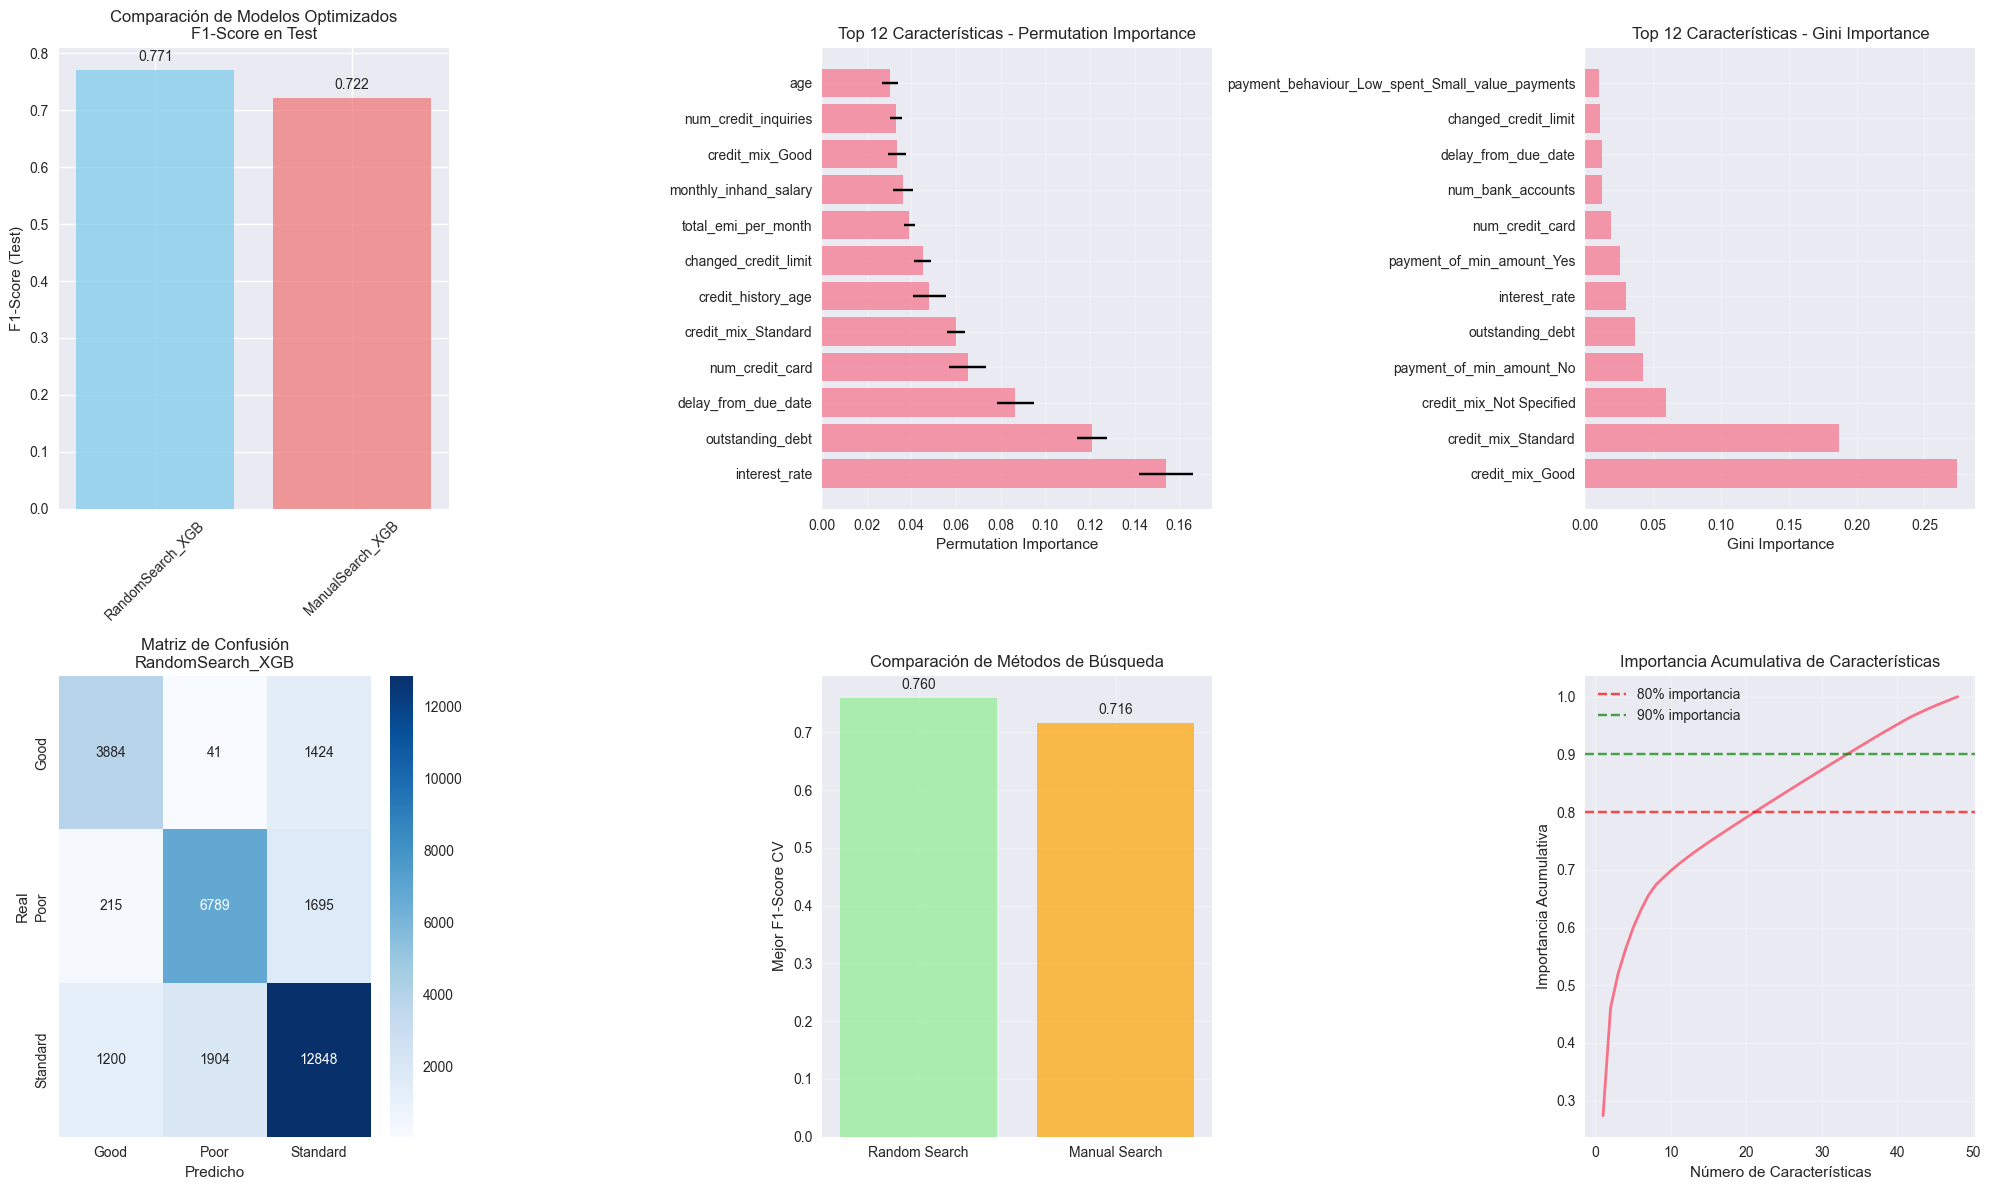


📈 ANALIZANDO COMPORTAMIENTO DEL MODELO...
📊 Análisis de sobreajuste:
  • Diferencia promedio train-test: 0.0666
  • Configuraciones probadas: 25
  • Mejor configuración: 0.7598

🎯 RESUMEN FINAL - XGBOOST AVANZADO OPTIMIZADO
⏱️  Tiempo total ejecución: 296.81s
🏆 Mejor modelo: RandomSearch_XGB
📈 F1-Score Test: 0.7711 (77.11%)
🎯 Validación Cruzada: 0.7598 ± 0.0115

🔧 MEJORES HIPERPARÁMETROS:
  colsample_bytree: 0.9933692563579372
  learning_rate: 0.12964733273336593
  max_depth: 9
  min_child_weight: 1
  n_estimators: 173
  reg_alpha: 0.5081987767407187
  reg_lambda: 2.3916256135817635
  subsample: 0.943343521925488

📊 CARACTERÍSTICAS MÁS IMPORTANTES:
  1. interest_rate: 0.1543
  2. outstanding_debt: 0.1208
  3. delay_from_due_date: 0.0866
  4. num_credit_card: 0.0652
  5. credit_mix_Standard: 0.0599

⚡ EFICIENCIA COMPUTACIONAL:
  Randomized Search: 205.19s (25 iteraciones, 5-folds)
  Búsqueda Manual: 5 combinaciones (3-folds)
  Permutation Importance: 4.66s (5 repeticiones, 1500 muestra

In [9]:
# =============================================================================
# XGBOOST AVANZADO: VALIDACIÓN, TUNING E INTERPRETABILIDAD
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from scipy.stats import randint, uniform
import xgboost as xgb

print("🚀 INICIANDO XGBOOST AVANZADO - VALIDACIÓN, TUNING E INTERPRETABILIDAD...")
start_time = time.time()

# Configuraciones de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO CON PIPELINE
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir columnas
numerical_cols = ['age', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 
                 'interest_rate', 'delay_from_due_date', 'num_of_delayed_payment', 
                 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 
                 'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month', 
                 'amount_invested_monthly', 'monthly_balance']

categorical_cols = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train.shape[0]} train, {X_test.shape[0]} test")

# =============================================================================
# PIPELINE COMPLETO CON PREPROCESAMIENTO
# =============================================================================

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Obtener nombres de características después del preprocesamiento
preprocessor.fit(X_train)
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)) +
                ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan',
                 'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan'])

print(f"📊 Dimensionalidad final: {len(feature_names)} características")

# =============================================================================
# OPTIMIZACIÓN CON RANDOMIZED SEARCH CV (PRINCIPAL)
# =============================================================================

print(f"\n🎯 INICIANDO OPTIMIZACIÓN CON RANDOMIZED SEARCH CV...")

# Definir pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier(
        random_state=42,
        n_jobs=-1,
        tree_method='hist',  # Más rápido que 'exact'
        eval_metric='mlogloss'
    ))
])

# Distribuciones optimizadas para Randomized Search
param_dist = {
    'xgb__n_estimators': randint(50, 200),
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'xgb__subsample': uniform(0.6, 0.4),  # 0.6 a 1.0
    'xgb__colsample_bytree': uniform(0.6, 0.4),
    'xgb__reg_alpha': uniform(0, 1),
    'xgb__reg_lambda': uniform(1, 2),
    'xgb__min_child_weight': randint(1, 10)
}

# Configurar Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search CV optimizado
random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_dist,
    n_iter=25,  # REDUCIDO para mayor velocidad
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

print("🔍 Ejecutando Randomized Search Optimizado...")
random_start = time.time()
random_search.fit(X_train, y_train_encoded)
random_time = time.time() - random_start

print(f"✅ Randomized Search completado en {random_time:.2f}s")
print(f"🏆 Mejores parámetros: {random_search.best_params_}")
print(f"📈 Mejor score CV: {random_search.best_score_:.4f}")

# =============================================================================
# BÚSQUEDA MANUAL RÁPIDA SIMPLIFICADA (SIN EARLY STOPPING EN CV)
# =============================================================================

print(f"\n🎯 INICIANDO BÚSQUEDA MANUAL RÁPIDA...")

def evaluate_xgb_config_simple(n_estimators, max_depth, learning_rate, subsample, 
                              colsample_bytree, reg_alpha, reg_lambda, min_child_weight):
    """Evalúa una configuración específica de XGBoost sin early stopping en CV"""
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('xgb', xgb.XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            min_child_weight=min_child_weight,
            random_state=42,
            n_jobs=-1,
            tree_method='hist',
            eval_metric='mlogloss'
        ))
    ])
    
    # Usar validación cruzada simple sin early stopping
    cv_scores = cross_val_score(
        model, X_train, y_train_encoded, 
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # 3-folds para velocidad
        scoring='f1_macro', 
        n_jobs=-1
    )
    
    return cv_scores.mean()

# Búsqueda manual optimizada - combinaciones prometedoras para XGBoost
best_manual_score = 0
best_manual_params = {}
manual_results = []

print("🔍 Explorando combinaciones clave de XGBoost...")
# Combinaciones basadas en mejores prácticas para XGBoost
promising_combinations = [
    (100, 6, 0.1, 0.8, 0.8, 0.1, 1.0, 1),
    (150, 8, 0.05, 0.9, 0.7, 0.5, 1.5, 3),
    (200, 4, 0.2, 0.7, 0.9, 0.01, 2.0, 1),
    (100, 5, 0.15, 0.85, 0.75, 0.2, 1.2, 2),
    (120, 7, 0.08, 0.8, 0.8, 0.3, 1.8, 4),
]

for n_est, max_d, lr, subsample, colsample, alpha, lambda_, min_child in promising_combinations:
    try:
        score = evaluate_xgb_config_simple(n_est, max_d, lr, subsample, colsample, alpha, lambda_, min_child)
        manual_results.append({
            'n_estimators': n_est, 
            'max_depth': max_d, 
            'learning_rate': lr,
            'subsample': subsample,
            'colsample_bytree': colsample,
            'reg_alpha': alpha,
            'reg_lambda': lambda_,
            'min_child_weight': min_child,
            'score': score
        })
        if score > best_manual_score:
            best_manual_score = score
            best_manual_params = {
                'n_estimators': n_est,
                'max_depth': max_d, 
                'learning_rate': lr,
                'subsample': subsample,
                'colsample_bytree': colsample,
                'reg_alpha': alpha,
                'reg_lambda': lambda_,
                'min_child_weight': min_child
            }
        print(f"  ✅ Configuración: {n_est} árboles, {max_d} profundidad -> Score: {score:.4f}")
    except Exception as e:
        print(f"  ❌ Error en configuración: {e}")
        continue

print(f"✅ Búsqueda manual completada")
print(f"🏆 Mejores parámetros manuales: {best_manual_params}")
print(f"📈 Mejor score manual: {best_manual_score:.4f}")

# Entrenar modelo manual final
xgb_manual = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier(**best_manual_params, random_state=42, n_jobs=-1, tree_method='hist'))
])
xgb_manual.fit(X_train, y_train_encoded)

# =============================================================================
# COMPARACIÓN RÁPIDA DE MODELOS OPTIMIZADOS
# =============================================================================

print(f"\n🔍 COMPARANDO MODELOS OPTIMIZADOS...")

models = {
    'RandomSearch_XGB': random_search.best_estimator_,
    'ManualSearch_XGB': xgb_manual
}

results_advanced = {}

for model_name, model in models.items():
    print(f"\n🎯 Evaluando {model_name}...")
    
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Validación cruzada completa
    cv_scores = cross_val_score(
        model, X_train, y_train_encoded, 
        cv=skf, scoring='f1_macro', n_jobs=-1
    )
    
    # Importancia de características
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.named_steps['xgb'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    results_advanced[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'feature_importance': feature_importance,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"  ✅ F1-Score: {f1:.4f}")
    print(f"  ✅ CV F1-Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Seleccionar mejor modelo
best_model_name = max(results_advanced.items(), key=lambda x: x[1]['f1'])[0]
best_model_advanced = results_advanced[best_model_name]['model']
best_results_advanced = results_advanced[best_model_name]

print(f"\n🏆 MEJOR MODELO AVANZADO: {best_model_name}")
print(f"📊 F1-Score: {best_results_advanced['f1']:.4f}")

# =============================================================================
# INTERPRETABILIDAD - PERMUTATION IMPORTANCE (OPTIMIZADO)
# =============================================================================

print(f"\n🔍 CALCULANDO PERMUTATION IMPORTANCE (OPTIMIZADO)...")

# Preparar datos preprocesados
X_test_processed = preprocessor.transform(X_test)

# Muestrear para mayor velocidad (usar solo 1500 muestras)
sample_size = min(1500, X_test_processed.shape[0])
sample_indices = np.random.choice(X_test_processed.shape[0], sample_size, replace=False)
X_test_sampled = X_test_processed[sample_indices]
y_test_sampled = y_test_encoded[sample_indices]

# Calcular permutation importance con muestreo
perm_start = time.time()
perm_importance = permutation_importance(
    best_model_advanced.named_steps['xgb'],
    X_test_sampled,
    y_test_sampled,
    n_repeats=5,  # REDUCIDO para velocidad
    random_state=42,
    n_jobs=-1,
    scoring='f1_macro'
)
perm_time = time.time() - perm_start

print(f"✅ Permutation Importance calculado en {perm_time:.2f}s")

# Crear DataFrame con resultados
perm_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\n📊 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (Permutation):")
print(perm_df.head(10).round(4))

# =============================================================================
# ANÁLISIS DE ESTABILIDAD RÁPIDO
# =============================================================================

print(f"\n📊 ANALIZANDO ESTABILIDAD ENTRE MÉTODOS DE OPTIMIZACIÓN...")

# Calcular importancia promedio entre métodos
all_methods_importance = []
for model_name in results_advanced.keys():
    importance_df = results_advanced[model_name]['feature_importance'].set_index('feature')['importance']
    all_methods_importance.append(importance_df)

stability_df = pd.DataFrame(all_methods_importance).T
stability_df.columns = list(results_advanced.keys())
stability_df['mean_importance'] = stability_df.mean(axis=1)
stability_df['std_importance'] = stability_df.std(axis=1)

print("Características más estables entre métodos de optimización:")
stable_features = stability_df.nsmallest(8, 'std_importance')['mean_importance']
print(stable_features.round(4))

# =============================================================================
# VISUALIZACIONES ESENCIALES
# =============================================================================

plt.figure(figsize=(20, 12))

# Gráfico 1: Comparación de modelos optimizados
plt.subplot(2, 3, 1)
model_names = list(results_advanced.keys())
f1_scores = [results_advanced[model]['f1'] for model in model_names]
colors = ['skyblue', 'lightcoral']

bars = plt.bar(model_names, f1_scores, color=colors, alpha=0.8)
plt.ylabel('F1-Score (Test)')
plt.title('Comparación de Modelos Optimizados\nF1-Score en Test')
plt.xticks(rotation=45)
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Gráfico 2: Permutation Importance vs Gini Importance
plt.subplot(2, 3, 2)
top_perm = perm_df.head(12)
plt.barh(range(len(top_perm)), top_perm['importance_mean'], 
         xerr=top_perm['importance_std'], alpha=0.7, capsize=5)
plt.yticks(range(len(top_perm)), top_perm['feature'])
plt.xlabel('Permutation Importance')
plt.title('Top 12 Características - Permutation Importance')
plt.grid(True, alpha=0.3)

# Gráfico 3: Importancia Gini del mejor modelo
plt.subplot(2, 3, 3)
top_gini = best_results_advanced['feature_importance'].head(12)
plt.barh(range(len(top_gini)), top_gini['importance'], alpha=0.7)
plt.yticks(range(len(top_gini)), top_gini['feature'])
plt.xlabel('Gini Importance')
plt.title('Top 12 Características - Gini Importance')
plt.grid(True, alpha=0.3)

# Gráfico 4: Matriz de confusión del mejor modelo
plt.subplot(2, 3, 4)
y_pred_best = best_results_advanced['y_pred']
cm_best = confusion_matrix(y_test_encoded, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Matriz de Confusión\n{best_model_name}')
plt.ylabel('Real')
plt.xlabel('Predicho')

# Gráfico 5: Comparación de métodos de búsqueda
plt.subplot(2, 3, 5)
search_methods = ['Random Search', 'Manual Search']
search_scores = [random_search.best_score_, best_manual_score]
search_times = [random_time, 0]

bars = plt.bar(search_methods, search_scores, alpha=0.7, 
               color=['lightgreen', 'orange'])
plt.ylabel('Mejor F1-Score CV')
plt.title('Comparación de Métodos de Búsqueda')
for bar, score in zip(bars, search_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# Gráfico 6: Curva de importancia acumulativa
plt.subplot(2, 3, 6)
cumulative_importance = best_results_advanced['feature_importance']['importance'].cumsum()
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, linewidth=2)
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% importancia')
plt.axhline(y=0.9, color='g', linestyle='--', alpha=0.7, label='90% importancia')
plt.xlabel('Número de Características')
plt.ylabel('Importancia Acumulativa')
plt.title('Importancia Acumulativa de Características')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ANÁLISIS RÁPIDO DE COMPORTAMIENTO
# =============================================================================

print(f"\n📈 ANALIZANDO COMPORTAMIENTO DEL MODELO...")

# Usar resultados de Randomized Search para análisis
results_df = pd.DataFrame(random_search.cv_results_)
train_scores = results_df['mean_train_score']
test_scores = results_df['mean_test_score']
gap = train_scores - test_scores

print(f"📊 Análisis de sobreajuste:")
print(f"  • Diferencia promedio train-test: {gap.mean():.4f}")
print(f"  • Configuraciones probadas: {len(results_df)}")
print(f"  • Mejor configuración: {random_search.best_score_:.4f}")

# =============================================================================
# RESUMEN FINAL OPTIMIZADO
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*80)
print("🎯 RESUMEN FINAL - XGBOOST AVANZADO OPTIMIZADO")
print("="*80)

print(f"⏱️  Tiempo total ejecución: {execution_time:.2f}s")
print(f"🏆 Mejor modelo: {best_model_name}")
print(f"📈 F1-Score Test: {best_results_advanced['f1']:.4f} ({best_results_advanced['f1']*100:.2f}%)")
print(f"🎯 Validación Cruzada: {best_results_advanced['cv_mean']:.4f} ± {best_results_advanced['cv_std']*2:.4f}")

print(f"\n🔧 MEJORES HIPERPARÁMETROS:")
if best_model_name == 'RandomSearch_XGB':
    best_params = random_search.best_params_
else:
    best_params = best_manual_params

for param, value in best_params.items():
    param_name = param.replace('xgb__', '')
    print(f"  {param_name}: {value}")

print(f"\n📊 CARACTERÍSTICAS MÁS IMPORTANTES:")
for i in range(5):
    feature = perm_df.iloc[i]['feature']
    importance = perm_df.iloc[i]['importance_mean']
    print(f"  {i+1}. {feature}: {importance:.4f}")

print(f"\n⚡ EFICIENCIA COMPUTACIONAL:")
print(f"  Randomized Search: {random_time:.2f}s (25 iteraciones, 5-folds)")
print(f"  Búsqueda Manual: 5 combinaciones (3-folds)")
print(f"  Permutation Importance: {perm_time:.2f}s (5 repeticiones, 1500 muestras)")

print(f"\n🎯 ESTABILIDAD DEL MODELO:")
print(f"  Característica más estable: {stable_features.index[0]}")
print(f"  Número de características con >80% importancia: {(cumulative_importance <= 0.8).sum()}")

print(f"\n📋 REPORTE CLASIFICACIÓN ({best_model_name}):")
print(classification_report(y_test_encoded, y_pred_best, target_names=le.classes_))

# =============================================================================
# GUARDADO DE RESULTADOS
# =============================================================================

advanced_results = {
    'best_model': best_model_advanced,
    'best_model_name': best_model_name,
    'best_params': best_params,
    'random_search_results': random_search.cv_results_,
    'manual_search_results': manual_results,
    'permutation_importance': perm_df,
    'stability_analysis': stability_df,
    'feature_names': feature_names,
    'results_advanced': results_advanced,
    'execution_time': execution_time,
    'preprocessor': preprocessor,
    'label_encoder': le
}

joblib.dump(advanced_results, 'xgboost_advanced_optimized.pkl')
print(f"\n💾 Resultados avanzados guardados: 'xgboost_advanced_optimized.pkl'")

# Guardar el mejor modelo por separado
joblib.dump(best_model_advanced, 'best_xgboost_model_optimized.pkl')
print(f"💾 Mejor modelo guardado: 'best_xgboost_model_optimized.pkl'")

print("="*80)
print("✅ ANÁLISIS COMPLETADO - XGBOOST AVANZADO OPTIMIZADO")
print("="*80)